In [65]:

from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:

from sklearn.linear_model import ElasticNet,LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from sklearn.model_selection import GridSearchCV,train_test_split



In [67]:
train = pd.read_csv('Train_High.csv')

In [74]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'intergration', 'Life Cy', 'var 100_10',
       'min', 'kurtosis', 'skewness', 'intergration.1', 'charge tym', 'Slope',
       'Intercept', 'Q_d', 'IR_diff', 'IR_min', 'Dis_max', 'log10_Var100-10'],
      dtype='object')

In [75]:
train.head()

,Unnamed: 0,Unnamed: 0.1,intergration,Life Cy,var 100_10,min,kurtosis,skewness,intergration.1,charge tym,Slope,Intercept,Q_d,IR_diff,IR_min,Dis_max,log10_Var100-10
0,2,2,385915.5517,1074,0.000077,-0.027275,-1.145265,-0.217341,10269949.67,1440.52884,0.000011,1.079755,0.003653,-0.000146,0.015923,1.076127,-4.112497
1,3,3,392575.0602,870,0.000169,-0.041380,-1.027309,-0.444494,10424435.20,2160.62376,-0.000006,1.097254,0.001898,-0.000049,0.000000,1.093864,-3.771349
2,4,4,415083.9869,788,0.000068,-0.026572,-0.860833,-0.716910,10990040.16,1440.52842,0.000022,1.058972,0.006193,-0.000286,0.000000,1.053779,-4.170601
3,5,5,410674.0854,880,0.000108,-0.031179,-1.196901,-0.410610,11001429.47,2460.95622,0.000026,1.074765,0.005235,-0.000080,0.016649,1.070966,-3.966116
4,6,6,395192.7842,862,0.000085,-0.029245,-1.259976,-0.250919,10537094.09,1200.48266,0.000023,1.085288,0.005154,-0.000022,0.000000,1.081166,-4.071447


In [76]:
x = train[['min','log10_Var100-10','Dis_max','Slope', 'Intercept','intergration.1','charge tym','IR_min','IR_diff']]
y = train['Life Cy']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1 ,random_state=1 )

In [77]:
alphas = [-0.01 ,-0.001 , 0.0000 , 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(xtrain,ytrain)   
    score = model.score(xtest, ytest)
    pred_y = model.predict(xtest)
    mse = mean_squared_error(ytest, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))






Alpha:-0.0100, R2:0.86, MSE:1012.09, RMSE:31.81
Alpha:-0.0010, R2:0.26, MSE:5402.31, RMSE:73.50
Alpha:0.0000, R2:-9.56, MSE:77184.53, RMSE:277.82
Alpha:0.0001, R2:0.56, MSE:3194.19, RMSE:56.52
Alpha:0.0010, R2:0.49, MSE:3752.44, RMSE:61.26
Alpha:0.0100, R2:-0.22, MSE:8909.58, RMSE:94.39
Alpha:0.1000, R2:-6.99, MSE:58372.95, RMSE:241.60
Alpha:0.3000, R2:-13.87, MSE:108696.70, RMSE:329.69
Alpha:0.5000, R2:-16.60, MSE:128651.88, RMSE:358.68
Alpha:0.7000, R2:-18.04, MSE:139207.67, RMSE:373.11
Alpha:1.0000, R2:-19.26, MSE:148126.04, RMSE:384.87


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190609.41702289958, tolerance: 38.65491111111111
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287077.05197361566, tolerance: 38.65491111111111
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib

In [72]:
# alpha=0.01 Gives better results



R2:-0.219, MSE:8909.58, RMSE:94.39
    y_test        Pred
3      880  889.831358
16    1051  917.874067
6.891898306361521


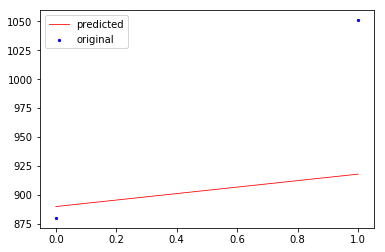

In [79]:
elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

df = pd.DataFrame()
df ['y_test'] = ytest
df['Pred'] = ypred
print(df)


def mean_absolute_percentage_error(yt, yp): 
    yt, yp = np.array(yt), np.array(yp)
    return np.mean(np.abs((yt - yp) / yt)) * 100
print(mean_absolute_percentage_error(ytest,ypred))
      
      
x_axis1 = range(len(xtest))
plt.scatter(x_axis1, ytest, s=5, color="blue", label="original")
plt.plot(x_axis1, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()



import pickle
filename = 'High_Regression.sav'
pickle.dump(elastic, open(filename, 'wb'))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


0.7146283030319114
{'alpha': 0.5556, 'l1_ratio': 0.9}
___________________________________________-
R2:-2.342, MSE:24428.81, RMSE:156.30
    y_test        Pred
3      880  855.184599
16    1051  831.359788
11.859072196034594


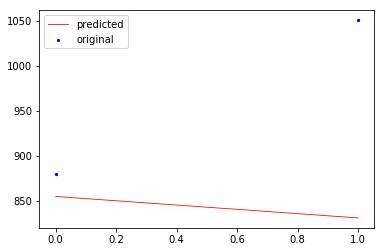

In [51]:
# --- ElasticNetCV ----

# alpha=0.01 Gives better results
# clf = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

# best_clf = clf.fit(X_train, y_train)
# clf.best_score_
# clf.best_params_
# predictions = best_clf.predict(X_test)

regression=ElasticNet(max_iter=50000,random_state=1,normalize=True)


params={'alpha':np.linspace(0.0001,1,10),'l1_ratio':np.linspace(0.1,1,10)}

grid=GridSearchCV(estimator=regression,param_grid=params,cv=5,iid=False)
best_grid = grid.fit(xtrain, ytrain)
print(grid.score(xtrain,ytrain))
print(grid.best_params_)
print("___________________________________________-")    
    
ypred = best_grid.predict(xtest)    
score = best_grid.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

df = pd.DataFrame()
df ['y_test'] = ytest
df['Pred'] = ypred
print(df)
def mean_absolute_percentage_error(yt, yp): 
    yt, yp = np.array(yt), np.array(yp)
    return np.mean(np.abs((yt - yp) / yt)) * 100
print(mean_absolute_percentage_error(ytest,ypred))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()






In [52]:
# model.sa('Ecv.h5')
import pickle
filename2 = 'Best_model2.sav'
pickle.dump(grid, open(filename2, 'wb'))


# Primary Data set Testing

In [80]:
primary = pd.read_csv('primary_High.csv')

In [81]:
primary.head()

,Unnamed: 0,Unnamed: 0.1,intergration,Life Cy,var 100_10,min,kurtosis,skewness,intergration.1,charge tym,Slope,Intercept,Q_d,IR_diff,IR_min,Dis_max,log10_Var100-10
0,3,3,3.971887e+05,636,0.000177,-0.040403,-1.085509,-0.512134,1.050499e+07,2161.02742,-0.000005,1.081157,0.003407,-0.000333,0.000000,1.075836,-3.750816
1,4,4,4.060921e+05,1054,0.000096,-0.030239,-1.073159,-0.542556,1.006683e+07,2585.53164,0.000018,1.086771,0.004657,-0.000010,0.016611,1.082974,-4.019328
2,5,5,4.099304e+05,719,0.000104,-0.031797,-0.976452,-0.660797,1.102065e+07,1741.22920,0.000029,1.066175,0.006626,-0.000236,0.016543,1.061124,-3.981850
3,6,6,3.899949e+05,857,0.000117,-0.031708,-1.290662,-0.342929,9.691337e+06,1972.80190,0.000018,1.076194,0.004924,0.000005,0.016238,1.072052,-3.930855
4,7,7,7.655815e+06,691,0.014541,-0.859547,40.408182,-6.344775,9.188602e+06,1993.40258,-0.000295,1.101465,-0.001643,-0.002008,0.015846,1.066170,-1.837397


In [82]:
primary.drop(4 ,inplace=True)

In [83]:
primary.head()

,Unnamed: 0,Unnamed: 0.1,intergration,Life Cy,var 100_10,min,kurtosis,skewness,intergration.1,charge tym,Slope,Intercept,Q_d,IR_diff,IR_min,Dis_max,log10_Var100-10
0,3,3,397188.6609,636,0.000177,-0.040403,-1.085509,-0.512134,1.050499e+07,2161.02742,-0.000005,1.081157,0.003407,-0.000333,0.000000,1.075836,-3.750816
1,4,4,406092.0997,1054,0.000096,-0.030239,-1.073159,-0.542556,1.006683e+07,2585.53164,0.000018,1.086771,0.004657,-0.000010,0.016611,1.082974,-4.019328
2,5,5,409930.3857,719,0.000104,-0.031797,-0.976452,-0.660797,1.102065e+07,1741.22920,0.000029,1.066175,0.006626,-0.000236,0.016543,1.061124,-3.981850
3,6,6,389994.9077,857,0.000117,-0.031708,-1.290662,-0.342929,9.691337e+06,1972.80190,0.000018,1.076194,0.004924,0.000005,0.016238,1.072052,-3.930855
5,9,9,421962.4337,1017,0.000117,-0.034962,-1.123172,-0.450992,1.043582e+07,2834.03098,0.000002,1.077930,0.003096,-0.000012,0.016391,1.074536,-3.930476


In [84]:
x = primary[['min','log10_Var100-10','Dis_max','Slope', 'Intercept','intergration.1','charge tym','IR_min','IR_diff']]
y = primary['Life Cy']

R2:0.640, MSE:7229.07, RMSE:85.02
   y_test        Pred
0     636  780.247625
1    1054  920.413945
2     719  868.076306
3     857  854.538094
5    1017  887.793713

 
            y_test        Pred
count    18.000000   18.000000
mean    761.333333  778.474546
std     145.778236   90.887084
min     561.000000  628.491696
25%     652.500000  717.911788
50%     725.000000  780.421451
75%     859.250000  846.168358
max    1054.000000  920.413945
9.289938874113393


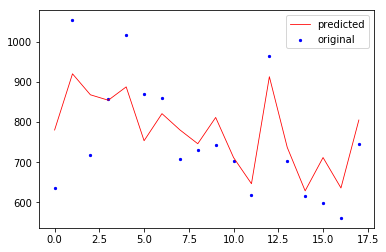

In [85]:
loaded_model = pickle.load(open(filename, 'rb'))

ypred = loaded_model.predict(x)
score = loaded_model.score(x, y)
mse = mean_squared_error(y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

df = pd.DataFrame()
df ['y_test'] = y
df['Pred'] = ypred
print(df.head())
print(end='\n \n')
print(df.describe())

def mean_absolute_percentage_error(yt, yp): 
    yt, yp = np.array(yt), np.array(yp)
    return np.mean(np.abs((yt - yp) / yt)) * 100
print(mean_absolute_percentage_error(y,ypred))

x_ax = range(len(x))
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#alpha = 0.01  --->85.02  , 9.2899

R2:0.539, MSE:9249.72, RMSE:96.18
   y_test        Pred
0     636  775.517749
1    1054  895.329520
2     719  828.943803
3     857  842.193132
5    1017  832.246734

 
            y_test        Pred
count    18.000000   18.000000
mean    761.333333  767.420511
std     145.778236   71.947839
min     561.000000  642.972628
25%     652.500000  712.036258
50%     725.000000  777.282722
75%     859.250000  826.090946
max    1054.000000  895.329520
10.958536274300199


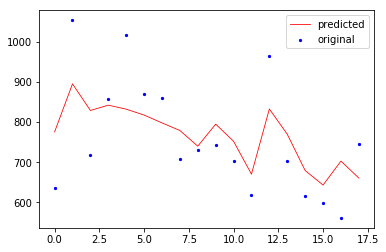

In [59]:
loaded_model = pickle.load(open(filename2, 'rb'))

ypred = loaded_model.predict(x)
score = loaded_model.score(x, y)
mse = mean_squared_error(y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

df = pd.DataFrame()
df ['y_test'] = y
df['Pred'] = ypred
print(df.head())
print(end='\n \n')
print(df.describe())

def mean_absolute_percentage_error(yt, yp): 
    yt, yp = np.array(yt), np.array(yp)
    return np.mean(np.abs((yt - yp) / yt)) * 100
print(mean_absolute_percentage_error(y,ypred))

x_ax = range(len(x))
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
#alpha = 0.0001  --->67.50  , 7.3524


# Secondary Data set Testing 

In [86]:
secondary_Data = pd.read_csv('Secondary_High.csv')

In [87]:
secondary_Data.head()

,Unnamed: 0,Unnamed: 0.1,Life Cy,var 100_10,min,kurtosis,skewness,intergration,charge tym,Slope,Intercept,Q_d,IR_diff,IR_min,Dis_max,log10_Var100-10,Intergration
0,0,0,1078,0.000059,-0.022833,-1.065416,-0.265790,9160636.002,2009.04070,-0.000003,1.064525,0.000616,-0.000139,0.015319,1.061775,-4.228618,374570.1560
1,1,1,1009,0.000064,-0.024288,-1.140872,-0.295537,8757617.635,1118.54980,-0.000005,1.070659,0.001999,-0.000136,0.015180,1.067455,-4.192130,359338.3783
2,2,2,1063,0.000053,-0.022238,-1.197356,-0.145832,9297767.173,1115.02006,-0.000015,1.068472,0.001417,-0.000106,0.014932,1.065060,-4.277214,384368.7161
3,4,4,1115,0.000083,-0.030315,-0.965184,-0.506573,9512723.305,1105.75160,-0.000013,1.065298,0.000705,0.000071,0.014885,1.062889,-4.079113,395661.0305
4,5,5,1048,0.000076,-0.024425,-0.839407,-0.333840,8885637.237,2262.78380,-0.000005,1.074805,0.001382,-0.000084,0.015085,1.072476,-4.117826,368133.3128


In [88]:
x = secondary_Data[['min','log10_Var100-10','Dis_max','Slope', 'Intercept','intergration','charge tym','IR_min','IR_diff']]
y = secondary_Data['Life Cy']

R2:-0.380, MSE:25346.72, RMSE:159.21
   y_test        Pred
0    1078  871.419186
1    1009  875.855613
2    1063  885.937481
3    1115  821.758592
4    1048  878.321191

 
            y_test        Pred
count    34.000000   34.000000
mean    940.470588  825.275360
std     137.548501   68.333242
min     667.000000  545.982446
25%     825.750000  814.302643
50%     933.500000  837.559893
75%    1047.500000  858.843487
max    1158.000000  945.879435
12.437221213960187


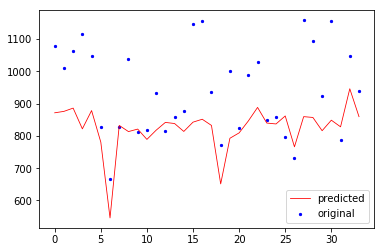

In [63]:
loaded_model = pickle.load(open(filename2, 'rb'))

ypred = loaded_model.predict(x)
score = loaded_model.score(x, y)
mse = mean_squared_error(y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

df = pd.DataFrame()
df ['y_test'] = y
df['Pred'] = ypred
print(df.head())
print(end='\n \n')
print(df.describe())

def mean_absolute_percentage_error(yt, yp): 
    yt, yp = np.array(yt), np.array(yp)
    return np.mean(np.abs((yt - yp) / yt)) * 100
print(mean_absolute_percentage_error(y,ypred))

x_ax = range(len(x))
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# alpha = 0.0001  --->125.93  , 10.41

R2:0.288, MSE:13076.65, RMSE:114.35
   y_test        Pred
0    1078  989.683891
1    1009  940.084540
2    1063  978.808909
3    1115  887.457932
4    1048  950.388700

 
            y_test         Pred
count    34.000000    34.000000
mean    940.470588   901.986813
std     137.548501    85.020227
min     667.000000   654.315635
25%     825.750000   858.781049
50%     933.500000   918.636410
75%    1047.500000   948.082486
max    1158.000000  1044.982873
9.605674595674756


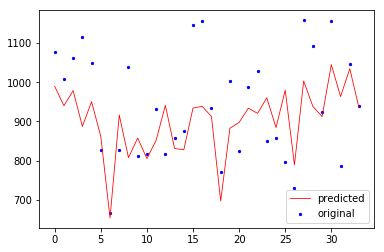

In [89]:
loaded_model = pickle.load(open(filename, 'rb'))

ypred = loaded_model.predict(x)
score = loaded_model.score(x, y)
mse = mean_squared_error(y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

df = pd.DataFrame()
df ['y_test'] = y
df['Pred'] = ypred
print(df.head())
print(end='\n \n')
print(df.describe())

def mean_absolute_percentage_error(yt, yp): 
    yt, yp = np.array(yt), np.array(yp)
    return np.mean(np.abs((yt - yp) / yt)) * 100
print(mean_absolute_percentage_error(y,ypred))

x_ax = range(len(x))
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
#alpha = 0.01  --->114.35  , 9.605